<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_ST_non_liniear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import seaborn as sns



def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")
#dataset=pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")


In [ ]:
dataset.head(10)

In [4]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)


In [5]:
dataset.shape

(2629, 123)

In [46]:
X = dataset.iloc[:,11:]
y = dataset.iloc[:, 7]

In [47]:
set(y)

{0.0, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.4}

In [37]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

In [48]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [22 43 44 45 67 68 74 76 90 91 92] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 12
                        Specs       Score
101           aEE_MAX(kJ/min)  460.184073
102   1_min_HR_Recovery(mean)  390.128672
104   2_min_HR_Recovery(mean)  390.128672
106   3_min_HR_Recovery(mean)  390.128672
108   4_min_HR_Recovery(mean)  390.128672
110   5_min_HR_Recovery(mean)  390.128672
100               HR_MAX(BPM)  244.964803
103  1_min_HR_Recovery(stdev)  181.685686
105  2_min_HR_Recovery(stdev)  181.685686
107  3_min_HR_Recovery(stdev)  181.685686
109  4_min_HR_Recovery(stdev)  181.685686
111  5_min_HR_Recovery(stdev)  181.685686


In [10]:
X_new.shape

(2629, 12)

In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)


<font color = "red" size='5'>No spliting </font>

In [11]:
"""
X_train=X_new.iloc[:148,:]
X_test=X_new.iloc[148:,:]
y_train=y_new.iloc[:148]
y_test=y_new.iloc[148:]
 """



---



In [50]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

In [51]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [52]:
# Code lines 1 to 3
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree)))
print(r2_score(y_test, pred_test_tree))

0.3835683161039678
0.5605712080857173
0.38020126643314095
0.5559602317582524


In [29]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.13)
dtree.fit(X_train, y_train)
pred_test_tree= dtree.predict(X_test)
print(r2_score(y_test, pred_test_tree))

0.12511126264570605


In [ ]:
prim_plot(y_test,pred_test_tree)

In [ ]:
"""
for i in range(1,500):
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=0.13)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,i)"""

In [31]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2'
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train)

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [32]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1)))
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1)))
print(r2_score(y_test, y1))

4.581204118761241e-16
1.0
0.545403274616974
0.12511126264570605


#Random Forest (or Bootstrap Aggregation)

In [54]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train)
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

1.4063248700237596e-15
1.0
1.415037118759184e-15
1.0


In [ ]:

for i in range(100,1000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)

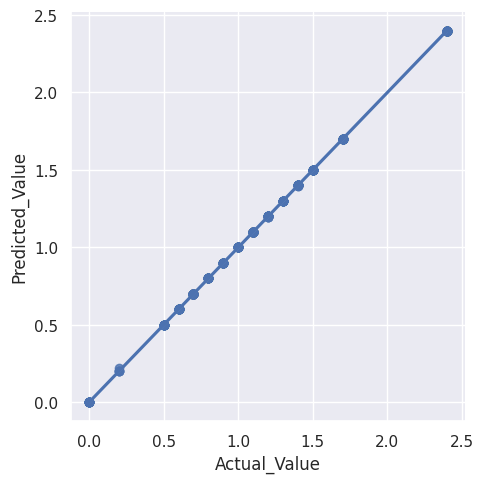

In [39]:
prim_plot(y_test,pred_test_rf)